<a href="https://colab.research.google.com/github/atal5/ML_DL_CLASS/blob/master/CNN_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CNN

CNN acronym for Convolutional Neural Networks are an important class of neural network for learning from image data

### Preparing image

First read images with librariy imageio (install it via conda install imageio in Terminal)

In [0]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import backend as K
from keras.utils import plot_model
from keras.initializers import Constant
from keras.optimizers import RMSprop
import numpy as np
import pandas as pd
import json


%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,6)
import imageio

In [0]:
x = imageio.imread('cat.jpeg')
x.shape

(300, 400, 3)

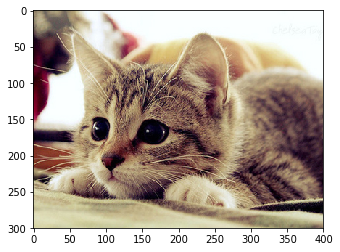

In [0]:
plt.imshow(x)
plt.savefig('cat.png')

### Convolution Layer

In [0]:
inputs = Input((None,None,3))
conv = Conv2D(filters=4, kernel_size=(21,21),strides=(1,1),
             padding='same',use_bias=False)(inputs)
conv_model = Model(inputs=inputs, outputs=conv)

Plot the network. If the following code results in an error message because pydot and graphviz are not installed 

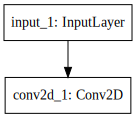

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(conv_model).create(prog='dot',format='svg'))

In [0]:
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 4)     5292      
Total params: 5,292
Trainable params: 5,292
Non-trainable params: 0
_________________________________________________________________


Total Parameters = $21 \times 21 \times 3 \times 4 = 5292$ 

Apply the convolution layers with randomly initialized filters to the image

In [0]:
batch = np.expand_dims(x,0)
batch.shape

(1, 300, 400, 3)

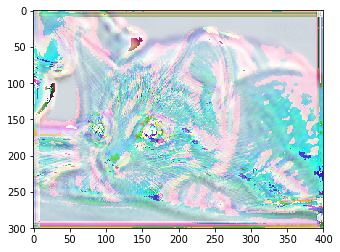

In [0]:
y0 = conv_model.predict(batch)[0].astype('uint8')
plt.imshow(y0);

Now instead of random initializatoin of the layer fix convolution weights

Reduce the size of the network to 3 filters: one will be applied to each channel

First, apply horizontal filer and pass it to the layer without training

In [0]:
inputs = Input((None,None,3))
conv = Conv2D(filters=3,kernel_size=(21,21),strides=(1,1),
             padding='same',use_bias=False)(inputs)
conv_model = Model(inputs=inputs, outputs=conv)
conv_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 3)     3969      
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [0]:
horizontal_filter = np.zeros(shape=(21,21,3,3))
for i in range(3):
    horizontal_filter[10,:,i,i] = 1.0/21.0
#fixing convolution weights
conv_model.layers[1].set_weights([horizontal_filter])

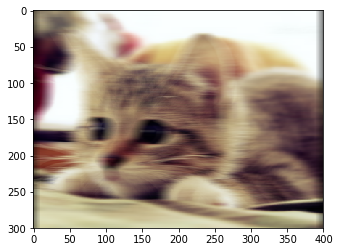

In [0]:
y1 = conv_model.predict(batch)[0].astype('uint8')
plt.imshow(y1)

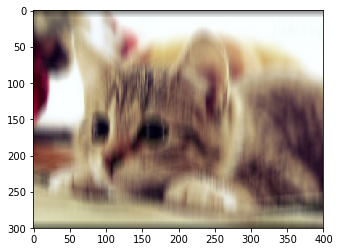

In [0]:
vertical_filter = np.zeros(shape=(21,21,3,3))
for i in range(3):
    vertical_filter[:,10,i,i] = 1.0/21.0
#fixing convolution weights
conv_model.layers[1].set_weights([vertical_filter])
y2 = conv_model.predict(batch)[0].astype('uint8')
plt.imshow(y2)

### MaxPooling Layer

In [0]:
inputs = Input((None,None,3))
maxpool = MaxPooling2D(pool_size=(6,6))(inputs)
maxpool_model = Model(inputs=inputs,output=maxpool)
maxpool_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, None, None, 3)     0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


/Users/raghavatal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ma...)`
  This is separate from the ipykernel package so we can avoid doing imports until


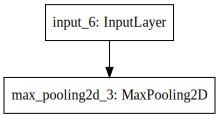

In [0]:
SVG(model_to_dot(maxpool_model).create(prog='dot',format='svg'))

(300, 400, 3)
(50, 66, 3)


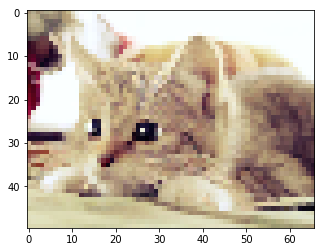

In [0]:
y3 = maxpool_model.predict(batch)[0].astype('uint8')
print(x.shape)
print(y3.shape)
plt.imshow(y3)

## Fashion MNIST

In [0]:
#Load the data
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Label:  0
Shape:  (28, 28)


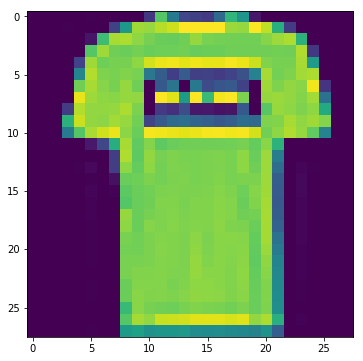

In [0]:
idx=1
print('Label: ', y_train[idx])
print('Shape: ',x_train[idx].shape)
plt.imshow(x_train[idx])
plt.show()

In [0]:
LabelData = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'AnkleBoot'
}

Text(0.5, 1.0, 'Object: Pullover')

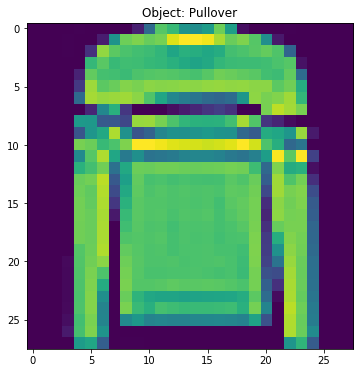

In [0]:
plt.imshow(x_train[5])
plt.title("Object: " + str(LabelData[y_train[5]]))

In [0]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique,counts))

{0: 6000,
 1: 6000,
 2: 6000,
 3: 6000,
 4: 6000,
 5: 6000,
 6: 6000,
 7: 6000,
 8: 6000,
 9: 6000}

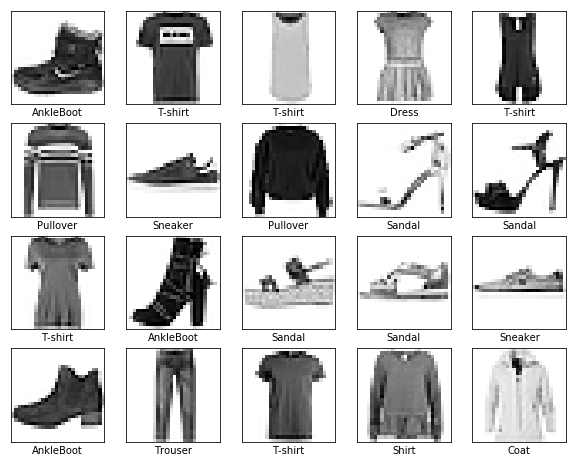

In [0]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap='Greys')
    plt.xlabel(LabelData[y_train[i]])

## Data Preparation

Prepare the data for analysis

In [0]:
batch_size = 128
num_classes = 10
epochs = 40

In [0]:
img_rows, img_cols = 28, 28

Check in which format the images are: number of channels first or last

In [0]:
K.image_data_format()

'channels_last'

Create reshaped train and test images to be (#samples, #rows, #columns, #channels)

In [0]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0],1,img_rows,img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
    x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
    input_shape = (img_rows, img_cols,1)

Scale the images

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Convert class vectors to binary class matrices

In [0]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)

### Model

A hint to still simple, but pretty powerful model below comes from here

Create the following function putting the model together

In [0]:
def makeModel(dropout_rate_1=0.0, dropout_rate_2=0.0
              ,dropout_rate_3=0.0,cnn_units_1=32,
              cnn_units_2=64, dense_units=128):
    model = Sequential()
    model.add(Conv2D(cnn_units_1,kernel_size=(5,5),
                    padding='same',
                    bias_initializer=Constant(0.02),
                    kernel_initializer='random_uniform',
                    activation='relu',
                    input_shape=input_shape))
    model.add(Conv2D(cnn_units_1,kernel_size=(5,5),
                    padding='same',
                    bias_initializer=Constant(0.02),
                    kernel_initializer='random_uniform',
                    activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
    model.add(Dropout(dropout_rate_1))
    if cnn_units_2 >0:
        model.add(Conv2D(cnn_units_2,kernel_size=(3,3),
                    padding='same',
                    bias_initializer=Constant(0.02),
                    kernel_initializer='random_uniform',
                    activation='relu'))
        model.add(Conv2D(cnn_units_2,kernel_size=(3,3),
                    padding='same',
                    bias_initializer=Constant(0.02),
                    kernel_initializer='random_uniform',
                    activation='relu'))
        model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
        model.add(Dropout(dropout_rate_2))
    model.add(Flatten())
    if  dense_units >0:
        model.add(Dense(dense_units,activation='relu',
                       bias_initializer=Constant(0.02),
                       kernel_initializer='random_uniform'))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate_3))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = RMSprop(lr=0.001,rho=0.9,epsilon=1e-08,decay=0.0)
    model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=optimizer,
                 metrics=['accuracy'])
    return model

In [0]:
model = makeModel(dropout_rate_1=0.25,dropout_rate_2=0.25,
                 dropout_rate_3=0.5,cnn_units_1=32,cnn_units_2=64,
                 dense_units=512)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
__________

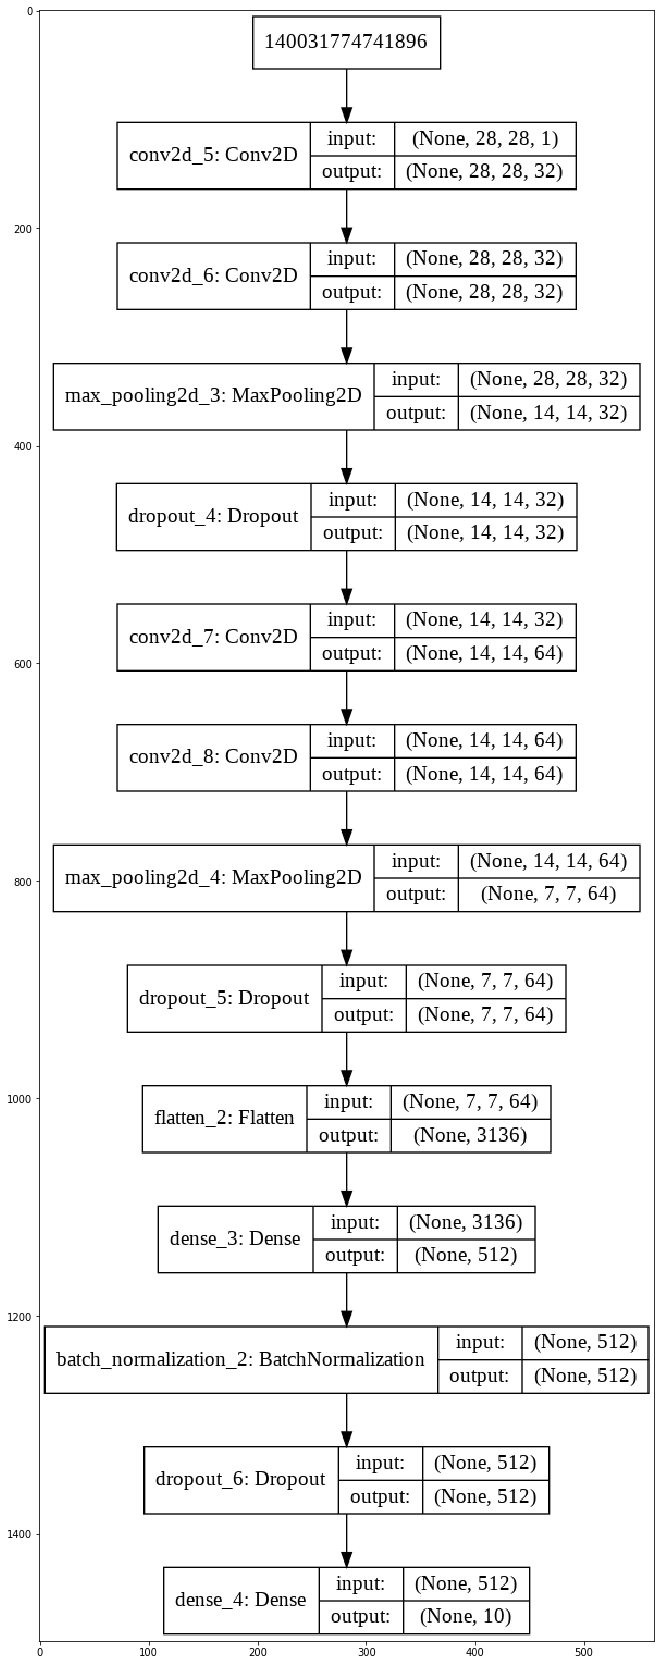

In [0]:
mpl.rcParams['figure.figsize'] = (25,30)
plot_model(model, to_file='fashion_mnist.png',show_shapes=True)
plt.imshow(imageio.imread('fashion_mnist.png'))

In [0]:
his = model.fit(x_train,y_train,batch_size=batch_size,
               epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 7s 115us/step - loss: 0.4935 - acc: 0.8233 - val_loss: 0.3388 - val_acc: 0.8751
Epoch 2/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.3177 - acc: 0.8849 - val_loss: 0.3439 - val_acc: 0.8749
Epoch 3/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.2764 - acc: 0.8999 - val_loss: 0.3051 - val_acc: 0.8950
Epoch 4/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.2526 - acc: 0.9096 - val_loss: 0.2643 - val_acc: 0.9053
Epoch 5/40
60000/60000 [==============================] - 6s 105us/step - loss: 0.2328 - acc: 0.9168 - val_loss: 0.2219 - val_acc: 0.9205
Epoch 6/40
60000/60000 [==============================] - 6s 106us/step - loss: 0.2189 - acc: 0.9205 - val_loss: 0.2286 - val_acc: 0.9196
Epoch 7/40
60000/60000 [==============================] - 7s 110us/step - loss: 0.2099 - acc: 0.9228 - val_loss: 0.2431 - 

In [0]:
model.save('cnn_fashion_mnist.h5')

In [0]:
with open('fit_history.json','w') as f:
  json.dump(his.history,f)
  

In [0]:
#Run if there is saved history
with open('fit_history.json') as json_file:
    loaded_his=json.load(json_file)

Final train and test loss:  [0.10825266683499019] [0.2147696081876755]


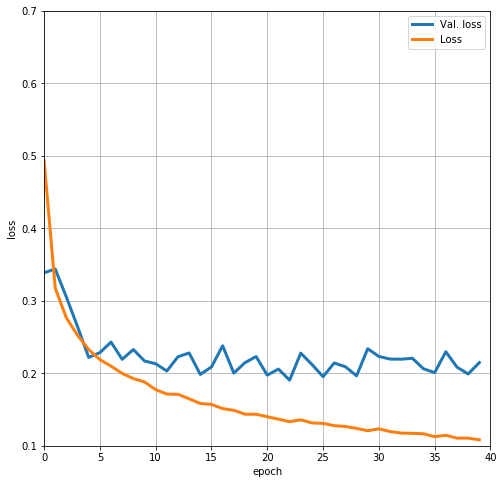

In [0]:
mpl.rcParams['figure.figsize'] = (8,8)

valid_loss = loaded_his['val_loss']
loss = loaded_his['loss']
print('Final train and test loss: ',loss[-1:],valid_loss[-1:])

plt.plot(valid_loss,linewidth=3,label='Val. loss')
plt.plot(loss, linewidth=3, label='Loss')

plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.xlim(0,40)
plt.ylim(0.1,0.7)
plt.show()


Final train and test accuracy:  [0.9612500000317892] [0.9355]


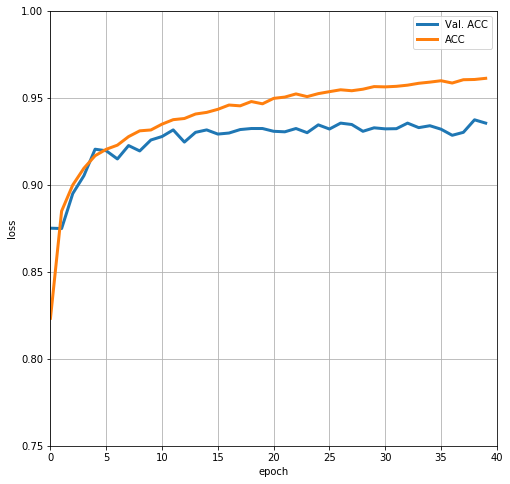

In [0]:
valid_acc = loaded_his["val_acc"]
acc= loaded_his["acc"]
print('Final train and test accuracy: ',acc[-1:],valid_acc[-1:])


plt.plot(valid_acc, linewidth=3, label="Val. ACC")
plt.plot(acc, linewidth=3, label="ACC")

plt.grid()
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.xlim(0, 40)
plt.ylim(0.75, 1)
plt.show()